In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import string

#Tokenization and Lowercasing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.cluster import KMeans


In [29]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ABAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ABAR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
df = pd.read_csv("./bbc_news.csv")

In [31]:
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [32]:
df.shape

(26304, 5)

In [33]:
# Drop one or more columns
df['Concatenated'] = df['title'] + df['description']
columns_to_drop = ['title','description','pubDate', 'guid', 'link']
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print("\nDataFrame after dropping columns:")
df


DataFrame after dropping columns:


,Concatenated
0,Ukraine: Angry Zelensky vows to punish Russian...
1,War in Ukraine: Taking cover in a town under a...
2,Ukraine war 'catastrophic for global food'One ...
3,Manchester Arena bombing: Saffie Roussos's par...
4,Ukraine conflict: Oil price soars to highest l...
...,...
26299,Hamas hostages: Stories of the people taken fr...
26300,Images show major damage to Gaza's oldest mosq...
26301,Palestinians mourn writer killed in air strike...
26302,Gaza Strip in maps: How life has changed in tw...


In [34]:
# Create a new DataFrame for processed data
processed_df = pd.DataFrame()

# Tokenize the text
processed_df['tokenized_text'] = df['Concatenated'].apply(lambda x: word_tokenize(str(x).lower()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
processed_df['filtered_text'] = processed_df['tokenized_text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Lemmatize the text
lemmatizer = WordNetLemmatizer()
processed_df['lemmatized_text'] = processed_df['filtered_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# The lemmatized text is converted back to a single string per article and stored in the 'preprocessed_text' column.
processed_df['preprocessed_text'] = processed_df['lemmatized_text'].apply(' '.join)

# Split the lemmatized text into words and remove punctuation
translator = str.maketrans('', '', string.punctuation)
processed_df['all_words'] = processed_df['preprocessed_text'].apply(lambda x: x.translate(translator).split())

# Flatten the list of lists
all_words_flat = [word for sublist in processed_df['all_words'] for word in sublist]

# Count word occurrences
word_counts = Counter(all_words_flat)

# Display the most common words
most_common_words = word_counts.most_common(10)  # Change 10 to the desired number of most common words
print("Most common words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most common words:
s: 12192
say: 4999
world: 3169
cup: 2420
england: 2306
ukraine: 2077
uk: 1949
new: 1936
woman: 1706
year: 1666


In [35]:
processed_df

,tokenized_text,filtered_text,lemmatized_text,preprocessed_text,all_words
0,"[ukraine, :, angry, zelensky, vows, to, punish...","[ukraine, :, angry, zelensky, vows, punish, ru...","[ukraine, :, angry, zelensky, vow, punish, rus...",ukraine : angry zelensky vow punish russian at...,"[ukraine, angry, zelensky, vow, punish, russia..."
1,"[war, in, ukraine, :, taking, cover, in, a, to...","[war, ukraine, :, taking, cover, town, attackj...","[war, ukraine, :, taking, cover, town, attackj...",war ukraine : taking cover town attackjeremy b...,"[war, ukraine, taking, cover, town, attackjere..."
2,"[ukraine, war, 'catastrophic, for, global, foo...","[ukraine, war, 'catastrophic, global, food'one...","[ukraine, war, 'catastrophic, global, food'one...",ukraine war 'catastrophic global food'one worl...,"[ukraine, war, catastrophic, global, foodone, ..."
3,"[manchester, arena, bombing, :, saffie, rousso...","[manchester, arena, bombing, :, saffie, rousso...","[manchester, arena, bombing, :, saffie, rousso...",manchester arena bombing : saffie roussos 's p...,"[manchester, arena, bombing, saffie, roussos, ..."
4,"[ukraine, conflict, :, oil, price, soars, to, ...","[ukraine, conflict, :, oil, price, soars, high...","[ukraine, conflict, :, oil, price, soar, highe...",ukraine conflict : oil price soar highest leve...,"[ukraine, conflict, oil, price, soar, highest,..."
...,...,...,...,...,...
26299,"[hamas, hostages, :, stories, of, the, people,...","[hamas, hostages, :, stories, people, taken, i...","[hamas, hostage, :, story, people, taken, isra...",hamas hostage : story people taken israelit th...,"[hamas, hostage, story, people, taken, israeli..."
26300,"[images, show, major, damage, to, gaza, 's, ol...","[images, show, major, damage, gaza, 's, oldest...","[image, show, major, damage, gaza, 's, oldest,...",image show major damage gaza 's oldest mosqueh...,"[image, show, major, damage, gaza, s, oldest, ..."
26301,"[palestinians, mourn, writer, killed, in, air,...","[palestinians, mourn, writer, killed, air, str...","[palestinian, mourn, writer, killed, air, stri...",palestinian mourn writer killed air strikewrit...,"[palestinian, mourn, writer, killed, air, stri..."
26302,"[gaza, strip, in, maps, :, how, life, has, cha...","[gaza, strip, maps, :, life, changed, two, mon...","[gaza, strip, map, :, life, changed, two, mont...",gaza strip map : life changed two monthsfind m...,"[gaza, strip, map, life, changed, two, monthsf..."


In [36]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tokenized_text     26304 non-null  object
 1   filtered_text      26304 non-null  object
 2   lemmatized_text    26304 non-null  object
 3   preprocessed_text  26304 non-null  object
 4   all_words          26304 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


In [37]:
sample_size = 1000 
random_sample = processed_df.sample(n=sample_size)
random_sample

,tokenized_text,filtered_text,lemmatized_text,preprocessed_text,all_words
22293,"[married, at, first, sight, cast, just, saw, m...","[married, first, sight, cast, saw, ella, ,, sa...","[married, first, sight, cast, saw, ella, ,, sa...","married first sight cast saw ella , say trans ...","[married, first, sight, cast, saw, ella, say, ..."
22006,"[asia, cup, :, virat, kohli, and, kl, rahul, h...","[asia, cup, :, virat, kohli, kl, rahul, help, ...","[asia, cup, :, virat, kohli, kl, rahul, help, ...",asia cup : virat kohli kl rahul help india thr...,"[asia, cup, virat, kohli, kl, rahul, help, ind..."
23760,"[us, hate, crimes, are, rising, -, this, is, h...","[us, hate, crimes, rising, -, stop, themexpert...","[u, hate, crime, rising, -, stop, themexperts,...",u hate crime rising - stop themexperts say ten...,"[u, hate, crime, rising, stop, themexperts, sa..."
2202,"[nationality, and, borders, bill, :, can, you,...","[nationality, borders, bill, :, lose, citizens...","[nationality, border, bill, :, lose, citizensh...",nationality border bill : lose citizenship ? n...,"[nationality, border, bill, lose, citizenship,..."
14801,"[cristiano, ronaldo, booked, for, kicking, bal...","[cristiano, ronaldo, booked, kicking, ball, aw...","[cristiano, ronaldo, booked, kicking, ball, aw...",cristiano ronaldo booked kicking ball away al ...,"[cristiano, ronaldo, booked, kicking, ball, aw..."
...,...,...,...,...,...
7334,"[eurostar, to, suspend, direct, trains, to, di...","[eurostar, suspend, direct, trains, disneyland...","[eurostar, suspend, direct, train, disneyland,...",eurostar suspend direct train disneyland paris...,"[eurostar, suspend, direct, train, disneyland,..."
19441,"[uk, inflation, rate, calculator, :, how, much...","[uk, inflation, rate, calculator, :, much, pri...","[uk, inflation, rate, calculator, :, much, pri...",uk inflation rate calculator : much price risi...,"[uk, inflation, rate, calculator, much, price,..."
13669,"[ethiopia, 's, online, horrors, :, ', i, saw, ...","[ethiopia, 's, online, horrors, :, ', saw, fat...","[ethiopia, 's, online, horror, :, ', saw, fath...",ethiopia 's online horror : ' saw father 's de...,"[ethiopia, s, online, horror, saw, father, s, ..."
9534,"[stratford, stabbing, :, woman, dies, and, ano...","[stratford, stabbing, :, woman, dies, another,...","[stratford, stabbing, :, woman, dy, another, i...",stratford stabbing : woman dy another injuredp...,"[stratford, stabbing, woman, dy, another, inju..."


In [38]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(random_sample['preprocessed_text'])
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

<Axes: >

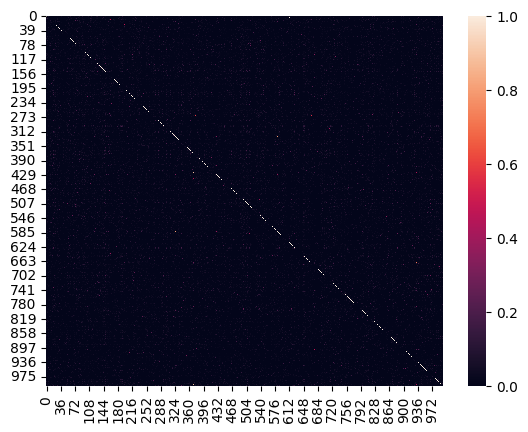

In [39]:
sns.heatmap(cosine_similarities)

In [47]:
# Apply K-Means clustering
num_clusters = 6  # Change this to the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(cosine_similarities)

C:\Users\ABAR\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

In [48]:
from sklearn.manifold import TSNE

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(cosine_similarities)

# Add the cluster labels to the DataFrame
random_sample['cluster'] = kmeans.labels_

# Display the resulting DataFrame with cluster labels
random_sample

,tokenized_text,filtered_text,lemmatized_text,preprocessed_text,all_words,cluster
22293,"[married, at, first, sight, cast, just, saw, m...","[married, first, sight, cast, saw, ella, ,, sa...","[married, first, sight, cast, saw, ella, ,, sa...","married first sight cast saw ella , say trans ...","[married, first, sight, cast, saw, ella, say, ...",3
22006,"[asia, cup, :, virat, kohli, and, kl, rahul, h...","[asia, cup, :, virat, kohli, kl, rahul, help, ...","[asia, cup, :, virat, kohli, kl, rahul, help, ...",asia cup : virat kohli kl rahul help india thr...,"[asia, cup, virat, kohli, kl, rahul, help, ind...",3
23760,"[us, hate, crimes, are, rising, -, this, is, h...","[us, hate, crimes, rising, -, stop, themexpert...","[u, hate, crime, rising, -, stop, themexperts,...",u hate crime rising - stop themexperts say ten...,"[u, hate, crime, rising, stop, themexperts, sa...",0
2202,"[nationality, and, borders, bill, :, can, you,...","[nationality, borders, bill, :, lose, citizens...","[nationality, border, bill, :, lose, citizensh...",nationality border bill : lose citizenship ? n...,"[nationality, border, bill, lose, citizenship,...",0
14801,"[cristiano, ronaldo, booked, for, kicking, bal...","[cristiano, ronaldo, booked, kicking, ball, aw...","[cristiano, ronaldo, booked, kicking, ball, aw...",cristiano ronaldo booked kicking ball away al ...,"[cristiano, ronaldo, booked, kicking, ball, aw...",3
...,...,...,...,...,...,...
7334,"[eurostar, to, suspend, direct, trains, to, di...","[eurostar, suspend, direct, trains, disneyland...","[eurostar, suspend, direct, train, disneyland,...",eurostar suspend direct train disneyland paris...,"[eurostar, suspend, direct, train, disneyland,...",0
19441,"[uk, inflation, rate, calculator, :, how, much...","[uk, inflation, rate, calculator, :, much, pri...","[uk, inflation, rate, calculator, :, much, pri...",uk inflation rate calculator : much price risi...,"[uk, inflation, rate, calculator, much, price,...",1
13669,"[ethiopia, 's, online, horrors, :, ', i, saw, ...","[ethiopia, 's, online, horrors, :, ', saw, fat...","[ethiopia, 's, online, horror, :, ', saw, fath...",ethiopia 's online horror : ' saw father 's de...,"[ethiopia, s, online, horror, saw, father, s, ...",0
9534,"[stratford, stabbing, :, woman, dies, and, ano...","[stratford, stabbing, :, woman, dies, another,...","[stratford, stabbing, :, woman, dy, another, i...",stratford stabbing : woman dy another injuredp...,"[stratford, stabbing, woman, dy, another, inju...",3


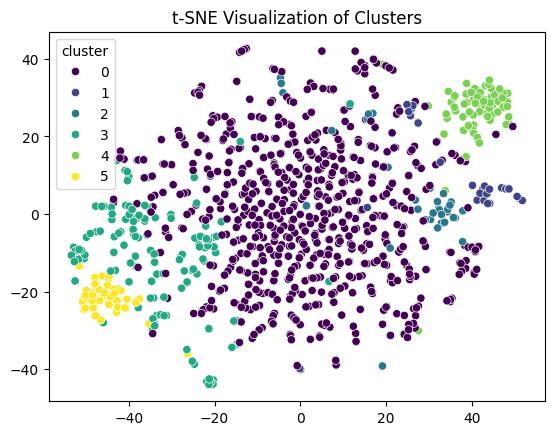

In [49]:
# Visualize the clusters with a scatter plot
sns.scatterplot(x=tsne_representation[:, 0], y=tsne_representation[:, 1], hue=random_sample['cluster'], palette='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()